# Which Prepaid Plan is Better?

You work as an analyst at a telecommunications operator company called Megaline. The company offers its clients two types of prepaid plans, namely the Surf plan and the Ultimate plan. The advertising department wants to know which prepaid plan generates more revenue, so they can create an advertising budget accordingly.

You will conduct an initial analysis of the prepaid plans based on a relatively small sample of clients. You have 500 Megaline client data, which contains information such as: who they are, where they come from, what type of package they use, and the number of calls and messages they sent in 2018. Your task is to analyze the behavior of the users, and then determine the package Which prepaid is more profitable?

In this project, I will analyze data for the telecommunication operator Megaline. The data that will be analyzed are two prepaid packages, Surf and Ultimate.

The purpose of this analysis is, to find out which prepaid package generates more revenue to adjust the advertising budget to analyze client behavior and determine which prepaid package brings in more revenue in the future.


The stages that will be carried out in analyzing this data include several main stages, namely:
1. Preparing data and understanding data
2. Analyze the data
3. Test the hypothesis

## Initialization

In [93]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import math as mt
import seaborn as sns

## Loading Data

In [2]:
# Muat file data ke dalam DataFrame yang berbeda
df_calls = pd.read_csv('/datasets/megaline_calls.csv')


In [3]:
df_internet = pd.read_csv('/datasets/megaline_internet.csv')


In [4]:
df_messages = pd.read_csv('/datasets/megaline_messages.csv')


In [5]:
df_plans = pd.read_csv('/datasets/megaline_plans.csv')


In [6]:
df_users = pd.read_csv('/datasets/megaline_users.csv')


## Preparing Data

The data for this project is divided into several tables such as calls, SMS/messages, internet, users, and plans. In this initial stage, we try to find out the content and information of the data and also to find out whether there are missing values ​​or if there are data types that are not as they should be. What can then be improved before further analysis is carried out?

In [7]:
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [8]:
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [9]:
df_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [10]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Prepaid Package

In [12]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
df_calls.info()
print()
df_internet.info()
print()
df_messages.info()
print()
df_plans.info()
print()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  D

In [13]:
# Tampilkan sampel data untuk paket-paket tersebut
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


From the information displayed, there is some data that does not have the correct data type, which must be changed before carrying out further analysis.

In [14]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [15]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [16]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [17]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## User

In [18]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
# Tampilkan sampel data pengguna
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


From the results displayed, some data types are not appropriate, such as in the `reg_date` and `churn_date` columns whose data type will then be changed to datetime.

### Fixed Data

In [20]:
#memperbaiki tipe data reg_date
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['reg_date'].dtype

dtype('<M8[ns]')

In [21]:
#memperbaiki tipe data churn_date
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

In [22]:
(500-34)/500

0.932

In [23]:
df_users['is_churn'] = df_users.apply(lambda x : False if pd.isna(x.churn_date) else True, axis=1)
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,False


In [24]:
df_users.duplicated().sum()

0

### Enriching Data Quality

## Calling

In [25]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [26]:
# Tampilkan sampel data berisi panggilan
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


It is necessary to change the data type in the `call_date` column and it is also necessary to round up for the duration to simplify calculations and further data processing.

### Fixing Data

In [27]:
#memperbaiki tipe data call_date
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['call_date'].dtype

dtype('<M8[ns]')

In [28]:
df_calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

### Enriching Data Quality

In [29]:
#
df_calls.groupby(['user_id'], axis=0, as_index=False).sum()

,user_id,duration
0,1000,116.83
1,1001,1640.46
2,1002,777.13
3,1003,1041.00
4,1004,2618.95
...,...,...
476,1495,1666.41
477,1496,1376.21
478,1497,276.53
479,1498,3029.97


## Message/SMS

In [30]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [31]:
# Tampilkan sampel data untuk SMS
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


It is necessary to change the data type in the `message_date` column from *object* to *datetime*.

### Fixing Data

In [32]:
#memperbaiki tipe data message_date
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages['message_date'].dtype

dtype('<M8[ns]')

In [33]:
df_messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

## Internet

In [34]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [35]:
# Tampilkan sampel data untuk traffic internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


It is necessary to change the data type in the `session_date` column to match the actual data type or the correct data type for the data. Which then adds or creates a new column `gb_used` to adjust gb usage according to the command by dividing by 1024.

### Fixing Data

In [36]:
#memperbaiki tipe data session_date
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet['session_date'].dtype

dtype('<M8[ns]')

In [92]:
df_internet.dtypes

id                      object
user_id                 object
session_date    datetime64[ns]
mb_used                float64
month                    int64
dtype: object

In [38]:
df_internets = df_internet.groupby(['user_id'], axis=0, as_index=False).sum()
df_internets

,user_id,mb_used
0,1000,1901.47
1,1001,80437.94
2,1002,40293.33
3,1003,27044.14
4,1004,156352.81
...,...,...
484,1495,98890.96
485,1496,64268.64
486,1497,11106.55
487,1498,227525.13


## Study the Terms and Conditions Regarding Prepaid Packages

In [39]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregates Data per User


In [40]:
#membulatkan durasi ke atas
df_calls['duration_rounded'] = np.ceil(df_calls['duration'])
df_calls.head()

,id,user_id,call_date,duration,duration_rounded
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0


In [41]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head()

,id,user_id,call_date,duration,duration_rounded,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12


In [42]:
# Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan. Simpan hasilnya.
monthly_call = df_calls.pivot_table(index= ['user_id', 'month'], values= 'duration_rounded', aggfunc='sum')
monthly_call = monthly_call.reset_index()
monthly_call.sort_values(by='user_id')

,user_id,month,duration_rounded
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2247,1498,6,238.0
2255,1499,10,385.0
2256,1499,11,308.0
2254,1499,9,346.0


In [43]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [44]:
monthly_message = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
monthly_message = monthly_message.reset_index()
monthly_message = monthly_message.rename(columns= {"id" : "monthly_message"})
monthly_message

,user_id,month,monthly_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [45]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
df_internet['month'] = df_internet['session_date'].dt.month
df_internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


In [46]:
monthly_internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
monthly_internet = monthly_internet.reset_index()
monthly_internet['gb_used'] = np.ceil(monthly_internet['mb_used'] / 1024)
monthly_internet.head()

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


In [47]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)
df_users_filter = df_users[['user_id', 'city', 'plan']]
df_user_plan = df_users_filter.merge(df_plans, left_on= 'plan', right_on= 'plan_name')
df_user_plan

,user_id,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1013,"Knoxville, TN MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...
495,1494,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
496,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
497,1496,"New Orleans-Metairie, LA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf


In [49]:
# Tambahkan informasi paket prabayarnya
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [50]:
# Hitung pendapatan bulanan untuk setiap pengguna
df_monthly_data = monthly_call.merge(monthly_message, how='outer', on=['user_id', 'month'])\
                              .merge(monthly_internet, how='outer', on=['user_id', 'month'])\
                              .merge(df_user_plan, on='user_id')
df_monthly_data.head()

,user_id,month,duration_rounded,monthly_message,mb_used,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,124.0,11.0,1901.47,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,182.0,30.0,6919.15,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,315.0,44.0,13314.82,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,393.0,53.0,22330.49,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,426.0,36.0,18504.30,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf


In [51]:
df_monthly_data.isna().sum()

user_id                    0
month                      0
duration_rounded          35
monthly_message          487
mb_used                   16
gb_used                   16
city                       0
plan                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

In [52]:
df_monthly_data[df_monthly_data['monthly_message'].isna()]

,user_id,month,duration_rounded,monthly_message,mb_used,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
29,1009,5,534.0,NaN,20389.40,20.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
30,1009,6,823.0,NaN,18845.90,19.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
31,1009,7,880.0,NaN,30421.65,30.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
32,1009,8,731.0,NaN,24557.52,24.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
33,1009,9,776.0,NaN,20962.40,21.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,1499,9,346.0,NaN,12984.76,13.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf
2260,1499,10,385.0,NaN,19492.43,20.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf
2261,1499,11,308.0,NaN,16813.83,17.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf
2262,1499,12,496.0,NaN,22059.21,22.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf


In [53]:
for column in ['duration_rounded', 'monthly_message', 'mb_used', 'gb_used']:
    df_monthly_data[column] = df_monthly_data[column].fillna(0)

In [54]:
df_monthly_data.isna().sum()

user_id                  0
month                    0
duration_rounded         0
monthly_message          0
mb_used                  0
gb_used                  0
city                     0
plan                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [55]:
df_monthly_data['gb_month_included'] = df_monthly_data['mb_per_month_included'] / 1024
df_monthly_data.head(10)

,user_id,month,duration_rounded,monthly_message,mb_used,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_month_included
0,1000,12,124.0,11.0,1901.47,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,8,182.0,30.0,6919.15,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,9,315.0,44.0,13314.82,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
3,1001,10,393.0,53.0,22330.49,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
4,1001,11,426.0,36.0,18504.30,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
5,1001,12,412.0,44.0,19369.18,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
6,1002,10,59.0,15.0,6552.01,7.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
7,1002,11,386.0,32.0,19345.08,19.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
8,1002,12,384.0,41.0,14396.24,15.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
9,1003,12,1104.0,50.0,27044.14,27.0,"Tulsa, OK MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0


In [56]:
def profit(row):
    call_charge = row['duration_rounded'] - row['minutes_included']
    msg_charge = row['monthly_message'] - row['messages_included']
    internet_charge = row['gb_used'] - row['gb_month_included']
    profit_charge = 0
    
    if call_charge > 0:
        profit_charge += call_charge * row['usd_per_minute']
    if msg_charge > 0:
        profit_charge += msg_charge * row['usd_per_message']
    if internet_charge > 0:
        profit_charge += internet_charge * row['usd_per_gb']
        
    return profit_charge + row['usd_monthly_pay']
        

In [57]:
df_monthly_data['profit'] = df_monthly_data.apply(profit, axis=1)
df_monthly_data.head(10)

,user_id,month,duration_rounded,monthly_message,mb_used,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_month_included,profit
0,1000,12,124.0,11.0,1901.47,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.00
1,1001,8,182.0,30.0,6919.15,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.00
2,1001,9,315.0,44.0,13314.82,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.00
3,1001,10,393.0,53.0,22330.49,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,90.09
4,1001,11,426.0,36.0,18504.30,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,60.00
5,1001,12,412.0,44.0,19369.18,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,60.00
6,1002,10,59.0,15.0,6552.01,7.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.00
7,1002,11,386.0,32.0,19345.08,19.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,60.00
8,1002,12,384.0,41.0,14396.24,15.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.00
9,1003,12,1104.0,50.0,27044.14,27.0,"Tulsa, OK MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,158.12


For-profit calculations at this stage, the aim is to find out how much *users* spend when using the package they use. For example, in the case of ultimate users, they still pay 70 USD in 12 months even though their usage is below the free capacity. However, if you look closely, several users use the surf package with a normal price of 20 dollars but have a payment of $90 which is much larger than the ultimate package, which can be concluded that these users use telephone and internet services beyond their free capacity, so they need to pay more.

## Study User Behavior

### Calling

In [58]:
avg_data = df_monthly_data.groupby('plan_name')['duration_rounded', 'monthly_message', 'gb_used'].agg(['mean', 'std', 'var'])

/tmp/ipykernel_119/202470709.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_data = df_monthly_data.groupby('plan_name')['duration_rounded', 'monthly_message', 'gb_used'].agg(['mean', 'std', 'var'])


In [59]:
avg_data

duration_rounded                           monthly_message  \
                      mean         std           var            mean   
plan_name                                                              
surf            428.749523  234.453150  54968.279461       31.159568   
ultimate        430.450000  240.508762  57844.464812       37.551389   

                                     gb_used                      
                 std          var       mean       std       var  
plan_name                                                         
surf       33.566717  1126.724522  16.670693  7.847522  61.58360  
ultimate   34.767179  1208.756744  17.306944  7.670108  58.83055

It can be seen that users of the surf and ultimate packages are similar, the average for calls is around 430 minutes per month, for SMS around 30 per month and for internet usage around 17 GB per month.

In [60]:
df_surf = df_monthly_data[df_monthly_data['plan_name'] == 'surf']
df_ultimate = df_monthly_data[df_monthly_data['plan_name'] == 'ultimate']

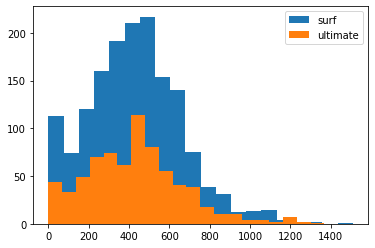

In [61]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
plt.hist(df_surf['duration_rounded'], bins=20, label='surf')
plt.hist(df_ultimate['duration_rounded'], bins=20, label='ultimate')
plt.legend()
plt.show()

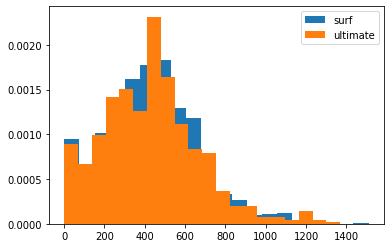

In [62]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
plt.hist(df_surf['duration_rounded'], bins=20, label='surf', density=True)
plt.hist(df_ultimate['duration_rounded'], bins=20, label='ultimate', density=True)
plt.legend()
plt.show()


[Hitung rata-rata dan variabel durasi panggilan untuk mempertimbangkan apakah pengguna pada paket yang berbeda memiliki perilaku penggunaan panggilan yang berbeda pula.]

In [63]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
avg_data = df_monthly_data.groupby('plan_name')['duration_rounded'].agg(['mean', 'var'])
avg_data

,mean,var
plan_name,,
surf,428.749523,54968.279461
ultimate,430.450000,57844.464812


<AxesSubplot:>

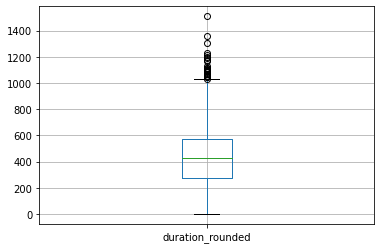

In [64]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
#surf
df_surf.boxplot('duration_rounded')

<AxesSubplot:>

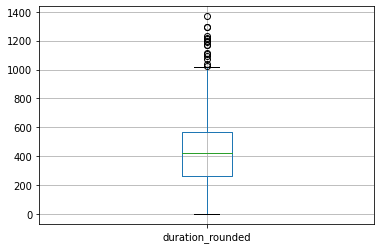

In [65]:
#ultimate
df_ultimate.boxplot('duration_rounded')

<AxesSubplot:xlabel='duration_rounded', ylabel='plan_name'>

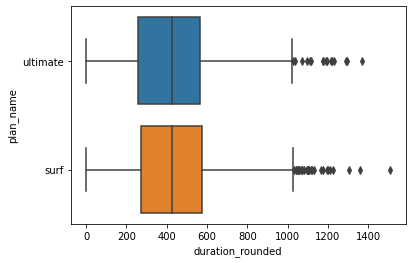

In [67]:
sns.boxplot(data=df_monthly_data, x='duration_rounded', y='plan_name')

It can be seen from the results of the two visualizations that: both the ultimate and surf packages were chosen by the user with results that are not much different, which can be seen from the results of the bar chart or boxplot. On average, both packages have almost the same value, around 400 minutes per month.

### Message/SMS

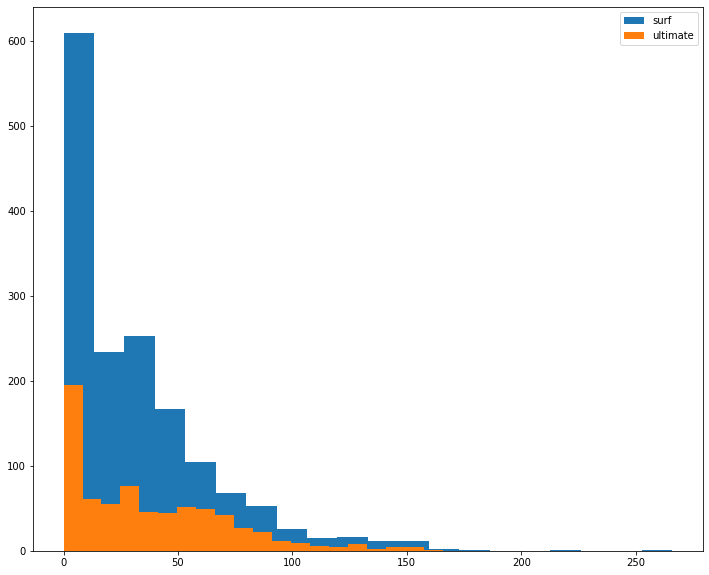

In [68]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
plt.figure(figsize=(12, 10))
plt.hist(df_surf['monthly_message'], bins=20, label='surf')
plt.hist(df_ultimate['monthly_message'], bins=20, label='ultimate')
plt.legend()
plt.show()

In [69]:

avg_data = df_monthly_data.groupby('plan_name')['monthly_message'].agg(['mean', 'var'])
avg_data

,mean,var
plan_name,,
surf,31.159568,1126.724522
ultimate,37.551389,1208.756744


<AxesSubplot:xlabel='monthly_message', ylabel='plan_name'>

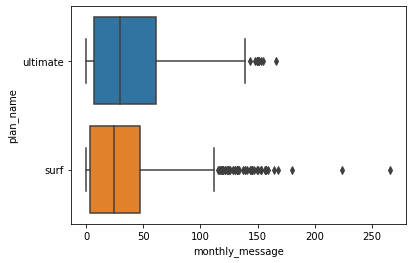

In [70]:
#Boxplot
sns.boxplot(data=df_monthly_data, x='monthly_message', y='plan_name')

<AxesSubplot:>

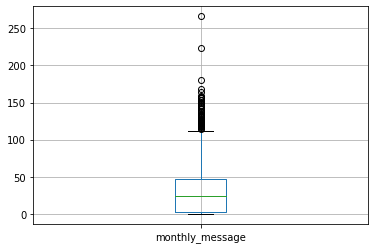

In [71]:
#surf
df_surf.boxplot('monthly_message')

<AxesSubplot:>

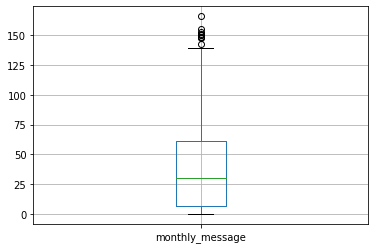

In [72]:
#ultimate
df_ultimate.boxplot('monthly_message')

It can be seen from the results of the two visualizations that: both the ultimate and surf packages were chosen by the user with results that are not much different, which can be seen from the results of the bar chart or boxplot. On average, both packages have almost the same value, around 30 SMS per month. for more details, 31 sms for surf and 36 sms for the ultimate package.

### Internet

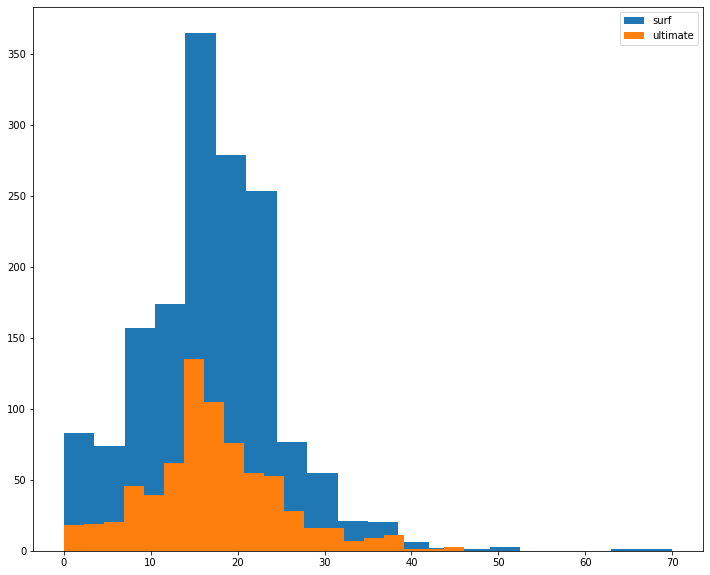

In [73]:
# Bandingkan jumlah traffic messages yang dihabiskan oleh pengguna per paket
plt.figure(figsize=(12, 10))
plt.hist(df_surf['gb_used'], bins=20, label='surf')
plt.hist(df_ultimate['gb_used'], bins=20, label='ultimate')
plt.legend()
plt.show()

In [74]:
avg_data = df_monthly_data.groupby('plan_name')['gb_used'].agg(['mean', 'var'])
avg_data

,mean,var
plan_name,,
surf,16.670693,61.58360
ultimate,17.306944,58.83055


<AxesSubplot:xlabel='gb_used', ylabel='plan_name'>

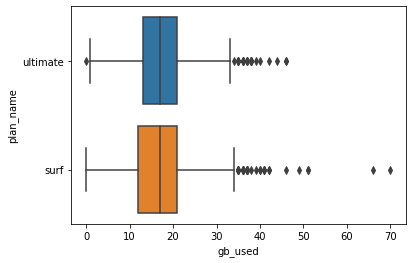

In [75]:
#Boxplot
sns.boxplot(data=df_monthly_data, x='gb_used', y='plan_name')

<AxesSubplot:>

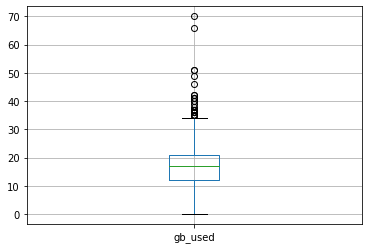

In [76]:
#surf
df_surf.boxplot('gb_used')

<AxesSubplot:>

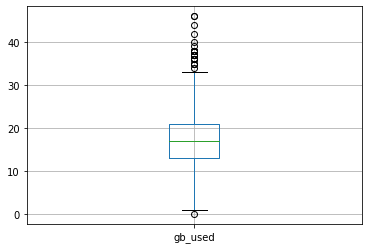

In [77]:
#ultimate
df_ultimate.boxplot('gb_used')

From the visualization results of user behavior for both the surf and ultimate packages, there is a relatively similar trend in internet capacity usage for each month of 16 GB, only a difference of 1 GB for the ultimate package.

## Revenue

In [94]:
df_monthly_data['profit'] = df_monthly_data.apply(profit, axis=1)
df_monthly_data

,user_id,month,duration_rounded,monthly_message,mb_used,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_month_included,profit
0,1000,12,124.0,11.0,1901.47,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.00
1,1001,8,182.0,30.0,6919.15,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.00
2,1001,9,315.0,44.0,13314.82,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.00
3,1001,10,393.0,53.0,22330.49,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,90.09
4,1001,11,426.0,36.0,18504.30,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,78.0,36730.05,36.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,112.00
2289,1349,10,0.0,76.0,13093.55,13.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.78
2290,1349,11,0.0,72.0,17128.26,17.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,40.66
2291,1349,12,0.0,61.0,13039.91,13.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.33


In [78]:
df_surf['profit'].describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: profit, dtype: float64

In [79]:
df_ultimate['profit'].describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: profit, dtype: float64

1. The Surf Package experienced a higher profit increase, namely the initial price of 20 USD to 60,706408 USD.
2. The Ultimate package also experienced an increase in profits, namely the initial price of 70 USD to 72.313889 USD.
3. Each package has increased by several dollars, for example: the profit for the Surf package is approximately 40 USD and the Ultimate package profit for the Ultimate package is 2 USD.

## Testing Statistical Hypotheses

Calculate the average Surf and Ultimate package revenue.
- H0 = AVERAGE PROFIT OF SURF AND ULTIMATE PACKAGES IS THE SAME
- H1 = AVERAGE PROFITS OF SURF AND ULTIMATE PACKAGES ARE DIFFERENT

In [80]:
profit_data = df_monthly_data.groupby('plan_name')['profit'].agg(['mean', 'var'])
profit_data

,mean,var
plan_name,,
surf,60.706408,3067.835152
ultimate,72.313889,129.848486


In [81]:
sample_1 = df_surf['profit']
sample_2 = df_ultimate['profit']

In [82]:
#uji levene untuk cek apakah varians samepl sama.
st.levene(sample_1, sample_2)

LeveneResult(statistic=404.7301727752691, pvalue=5.028876110654919e-83)

In [83]:
# Uji hipotesisnya
alpha = 0.5
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

In [84]:
results.pvalue

3.17039054811355e-15

In [85]:
if (results.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Tolak null hypothesis


Calculates the average revenue of users in the NY-NJ area and other regions.
- H0 = AVERAGE PROFIT OF USERS IN THE NY-NJ REGION IS THE SAME AS IN OTHER REGIONS
- H1 = AVERAGE USER PROFIT IN THE NY-NJ REGION IS DIFFERENT FROM THAT IN OTHER REGIONS

In [86]:
sample_3 = df_monthly_data.loc[df_monthly_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'profit']
sample_4 = df_monthly_data.loc[df_monthly_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'profit']

In [87]:
sample_3.mean()

59.921352785145885

In [88]:
sample_4.mean()

65.2227713987474

In [89]:
# Uji hipotesisnya
alpha = 0.5
results = st.ttest_ind(sample_3, sample_4, equal_var=False)

In [90]:
results.pvalue

0.03352561588530014

In [91]:
if (results.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Tolak null hypothesis


## General Conclusion

This analysis is carried out to find out who and how many users use prepaid packages so that we can see which prepaid packages can be profitable in the future.

There are several main stages of this analysis process, namely as follows:
- Prepare data
- Analyze data
- Test the hypothesis

From the final results of the analysis process it can be concluded that:
1. No serious *missing value* appears. The NaN in the `users` section shows that the user is still subscribed and no conclusions can be drawn yet.
2. There are several columns such as `calls`, `messages`, `users` and `internet` whose data types do not match, so the data type must be changed to the correct type.
3. Use several methods such as pivot, merge, and groupby to combine several columns. And use the boxplot and hist methods to display visualizations of the final data results so that they are easy to understand or digest.
4. In each aggregation result, a different number of rows will appear, this is caused by different service usage factors by the user. just as there are users who only use telephone services without using SMS services or other packages or use SMS and internet services without using telephone services. Some users do not use the service in certain months, thus showing *missing value*
5. For messaging services (SMS) and internet every month, the **Surf** package dominates and is the choice most used by users, although it is not too far from users of the **Ultimate** package, each of which has a difference of around 1-6 % For. And for the ultimate package calling service, the superior is only 2% per month.
6. The average income of users of the Ultimate and Surf telephone packages is different, it can be seen from the hypothesis results where 3.17039054811355e-15 is close to 0. So the results reject the zero hypothesis which means the average profit of the two packages is different.
7. The average user in the NY-NJ area only experiences a slight difference of around $5 and the pvalues ​​are 0.03352561588530014, so the results reject the null hypothesis which means the average profit of the two packages is different.